Ordinary least squares example

Static car model: velocity vs. power demand

In [8]:
using Plots
using Random
using LaTeXStrings

Set some example car paramters

In [9]:
m = 1500; # mass of car in kg
g = 9.81; # gravity in m/s^2
ρ = 1.29; # density of air in kg/m^3
A = 2.0; # frontal area of car in m^2
Cd = 0.35; # drag coefficient
Cr = 0.015; # rolling resistance coefficient
η  = 4.5; # Bearing friction coefficient in kg/s

α, β, γ = m*g*Cr, η, (ρ*A*Cd)/2 # condense parameters

(220.725, 4.5, 0.45149999999999996)

Generate some ground truth data

In [10]:
v = LinRange(0, 200/3.6, 25) # velocity vector in m/s
P = α*v + β*v.^2 + γ*v.^3; # vector of car power in W

Set up regressor matrix and measurement vector

In [15]:
Y = P + randn(length(P))*1000; # add some (optional) noise to the measurements 
Z = [v v.^2 v.^3] # form regressor matrix 

25×3 Matrix{Float64}:
  0.0         0.0           0.0
  2.31481     5.35837      12.4036
  4.62963    21.4335       99.229
  6.94444    48.2253      334.898
  9.25926    85.7339      793.832
 11.5741    133.959      1550.45
 13.8889    192.901      2679.18
 16.2037    262.56       4254.44
 18.5185    342.936      6350.66
 20.8333    434.028      9042.25
  ⋮                    
 37.037    1371.74      50805.3
 39.3519   1548.57      60939.0
 41.6667   1736.11      72338.0
 43.9815   1934.37      85076.5
 46.2963   2143.35      99229.0
 48.6111   2363.04     114870.0
 50.9259   2593.45          1.32074e5
 53.2407   2834.58     150915.0
 55.5556   3086.42          1.71468e5

Solve least squares problem

In [16]:
w = inv(Z'*Z)*Z'*Y

3-element Vector{Float64}:
 321.25650566327386
  -0.30608915014818194
   0.5031061656492284

Plot results

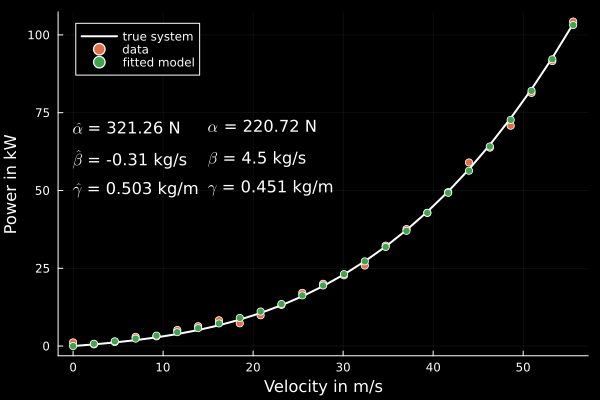

In [17]:
plot(v,Z*[α; β; γ]/1000, label="true system", 
linewidth=2, linecolor=:white, background_color="#000000",
foregroundcolourgrid=:white, grid=true)
plot!(v,Y/1000,seriestype=:scatter, label="data")
plot!(v,Z*w/1000, seriestype=:scatter, label="fitted model")
xlabel!("Velocity in m/s")
ylabel!("Power in kW")

# add annotation box showing estimated parameter values
annotate!([(0, 70, text(L"$\hat{\alpha}$ = %$(round(w[1]; digits = 2)) N", 
           11, :left, :white)),
           (0, 60, text(L"$\hat{\beta}$ = %$(round(w[2]; digits = 2)) kg/s", 
           11, :left, :white)),
           (0, 50, text(L"$\hat{\gamma}$ = %$(round(w[3]; digits = 3)) kg/m", 
           11, :left, :white))])

# add annotation box showing true parameter values
annotate!([(15, 70, text(L"$\alpha$ = %$(round(α; digits = 2)) N",
           11, :left, :white)),
           (15, 60, text(L"$\beta$ = %$(round(β; digits = 2)) kg/s", 
           11, :left, :white)),
           (15, 50, text(L"$\gamma$ = %$(round(γ; digits = 3)) kg/m", 
           11, :left, :white))])

Re-do study for different levels of measurement noise on car power

┌ Info: Saved animation to c:\Users\Oliver\Downloads\OLS_car_noise.gif
└ @ Plots C:\Users\Oliver\.julia\packages\Plots\9Q9pN\src\animation.jl:156


Plots.AnimatedGif("c:\\Users\\Oliver\\Downloads\\OLS_car_noise.gif")
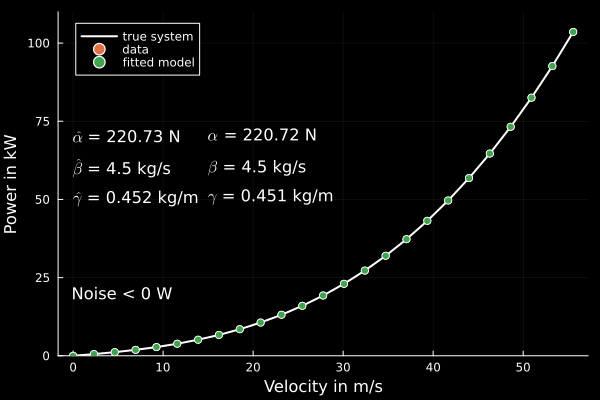

In [14]:
anim = @animate for ii = 0:30
    Y = P + rand(length(P))*200*ii; # add some noise to the measurements 
    w = inv(Z'*Z)*Z'*Y
    plot(v,Z*[α; β; γ]/1000, label="true system", 
    linewidth=2, linecolor=:white, background_color="#000000",
    foregroundcolourgrid=:white, grid=true)
    plot!(v,Y/1000,seriestype=:scatter, label="data")
    plot!(v,Z*w/1000, seriestype=:scatter, label="fitted model")
    xlabel!("Velocity in m/s")
    ylabel!("Power in kW")
    ylims!(0, 110)

    # add annotation box showing estimated parameter values
    annotate!([(0, 70, text(L"$\hat{\alpha}$ = %$(round(w[1]; digits = 2)) N", 
                11, :left, :white)),
                (0, 60, text(L"$\hat{\beta}$ = %$(round(w[2]; digits = 2)) kg/s", 
                11, :left, :white)),
                (0, 50, text(L"$\hat{\gamma}$ = %$(round(w[3]; digits = 3)) kg/m", 
                11, :left, :white))])

    # add annotation box showing true parameter values
    annotate!([(15, 70, text(L"$\alpha$ = %$(round(α; digits = 2)) N", 
                11, :left, :white)),
                (15, 60, text(L"$\beta$ = %$(round(β; digits = 2)) kg/s", 
                11, :left, :white)),
                (15, 50, text(L"$\gamma$ = %$(round(γ; digits = 3)) kg/m", 
                11, :left, :white))])

    annotate!([(0, 20, text("Noise < $(250*ii) W", 11, :left, :white))])

end

gif(anim, "OLS_car_noise.gif", fps = 0.5)